In [45]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold,cross_val_score
#import datapane as dp
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import sklearn.metrics as metrica
from  dash_bootstrap_templates  import  ThemeSwitchAIO
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
pd.options.display.max_columns = 200

In [2]:
#Trocar os nomes das colunas para ficar, mas fácil de entender
df = pd.read_csv('train.csv')
df = df.rename(columns={'height(cm)': 'altura(cm)', 'weight(kg)': 'peso(kg)', 'waist(cm)': 'cintura(cm)',
                        'eyesight(left)':'visao(esquerda)','eyesight(right)':'visao(direita)','hearing(left)':'audiçao(esquerda)'
                        ,'hearing(right)':'audiçao(direita)','systolic':'pressao arterial','relaxation':'relaxamento'
                        ,'fasting blood sugar':'acucar no sangue','Cholesterol':'colesterol','triglyceride':'triglicerídeo'
                        ,'HDL':'colesterol bom','LDL':'colesterol ruim','smoking':'fumante'})
#1 individuo e fumante e 0 nao e fumante 
df

,id,age,altura(cm),peso(kg),cintura(cm),visao(esquerda),visao(direita),audiçao(esquerda),audiçao(direita),pressao arterial,relaxamento,acucar no sangue,colesterol,triglicerídeo,colesterol bom,colesterol ruim,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,fumante
0,0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,80,64,238,47,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,80,89,213,202,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,70,84,189,45,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,90,122,165,148,55,80,14.4,1,1.1,22,17,37,0,1


In [3]:
#Visualizar se existe valores inválidos na base de dados
df.isnull().sum()

id                   0
age                  0
altura(cm)           0
peso(kg)             0
cintura(cm)          0
visao(esquerda)      0
visao(direita)       0
audiçao(esquerda)    0
audiçao(direita)     0
pressao arterial     0
relaxamento          0
acucar no sangue     0
colesterol           0
triglicerídeo        0
colesterol bom       0
colesterol ruim      0
hemoglobin           0
Urine protein        0
serum creatinine     0
AST                  0
ALT                  0
Gtp                  0
dental caries        0
fumante              0
dtype: int64

In [4]:
df.describe()

,id,age,altura(cm),peso(kg),cintura(cm),visao(esquerda),visao(direita),audiçao(esquerda),audiçao(direita),pressao arterial,relaxamento,acucar no sangue,colesterol,triglicerídeo,colesterol bom,colesterol ruim,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,fumante
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,98.352552,195.796165,127.616046,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,15.329740,28.396959,66.188989,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,46.000000,77.000000,8.000000,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,90.000000,175.000000,77.000000,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,96.000000,196.000000,115.000000,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,103.000000,217.000000,165.000000,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,375.000000,393.000000,766.000000,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [5]:
#Quero saber quantos valores de fumante e não fumantes tem na base de dados 
df['fumante'].value_counts()

0    89603
1    69653
Name: fumante, dtype: int64

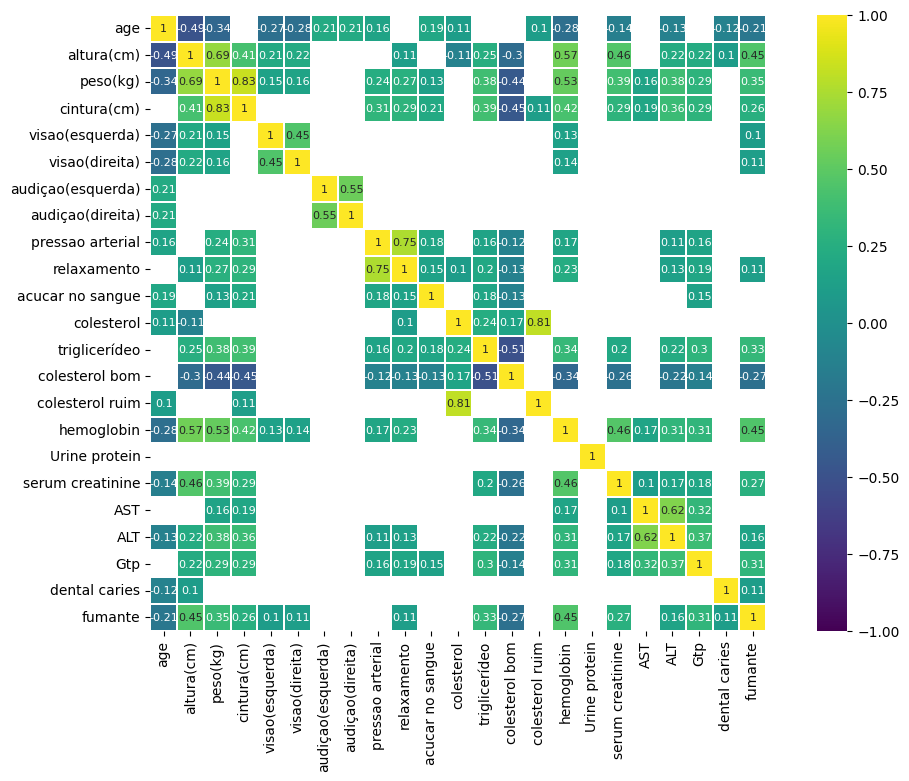

In [6]:
#Vou tirar a coluna id e fazer um gráfico para ver como esta as correlações
corr = df.drop(['id'], axis=1).corr() 
plt.figure(figsize=(13, 8))

sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True);

In [7]:
#Encontrei uma boa correlação dados aonde a coluna hemoglobin esta entre 11 e 15 
#tem uma taxa alta de pessoas não fumante
hemoglobina_boa = df[(df['hemoglobin'] >= 11) & (df['hemoglobin'] <= 15)]
hemoglobina_boa['fumante'].value_counts(normalize=True).round(2)

0    0.74
1    0.26
Name: fumante, dtype: float64

In [8]:
hemoglobina_ruim = df[(df['hemoglobin'] >= 15) | (df['hemoglobin'] <= 11)]
hemoglobina_ruim['fumante'].value_counts(normalize=True).round(2)

1    0.62
0    0.38
Name: fumante, dtype: float64

In [9]:
hemoglobina_b = df[df['hemoglobin'] <= 14]
hemoglobina_b['fumante'].value_counts(normalize=True).round(2)

0    0.9
1    0.1
Name: fumante, dtype: float64

In [10]:
hemoglobina_a = df[df['hemoglobin'] >= 15]
hemoglobina_a['fumante'].value_counts(normalize=True).round(2)

1    0.63
0    0.37
Name: fumante, dtype: float64

In [11]:
altura_a = df[df['altura(cm)'] >= 170]
altura_a['fumante'].value_counts(normalize=True).round(2)

1    0.64
0    0.36
Name: fumante, dtype: float64

In [12]:
hemoglobina_ruim2 = df[(df['hemoglobin'] >= 15) | (df['altura(cm)'] >= 170)]
hemoglobina_ruim2['fumante'].value_counts(normalize=True).round(2)

1    0.62
0    0.38
Name: fumante, dtype: float64

In [13]:
age_a = df[df['age'] <= 39]
age_a['fumante'].value_counts(normalize=True).round(2)

1    0.58
0    0.42
Name: fumante, dtype: float64

In [14]:
tri_a = df[df['triglicerídeo'] >= 100]
tri_a['fumante'].value_counts(normalize=True).round(2)

1    0.56
0    0.44
Name: fumante, dtype: float64

In [15]:
df.head(1)

,id,age,altura(cm),peso(kg),cintura(cm),visao(esquerda),visao(direita),audiçao(esquerda),audiçao(direita),pressao arterial,relaxamento,acucar no sangue,colesterol,triglicerídeo,colesterol bom,colesterol ruim,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,fumante
0,0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1


In [16]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


X = df.drop(['id','fumante'],axis=1) #df[['hemoglobin','triglicerídeo','altura(cm)','age','Gtp','peso(kg)']]
y = df['fumante']

    # Divida o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    #Crie um modelo XGBClassifier
model = xgb.XGBClassifier(
    objective='multi:softmax', # Classificação multiclasse
    num_class=6,  
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100
    )
    #6 76,65
    # Treine o modelo no conjunto de treinamento
model.fit(X_train, y_train)

    # Faça previsões no conjunto de teste
y_pred = model.predict(X_test)

    # Avalie o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')
    

Acurácia do modelo: 77.97%


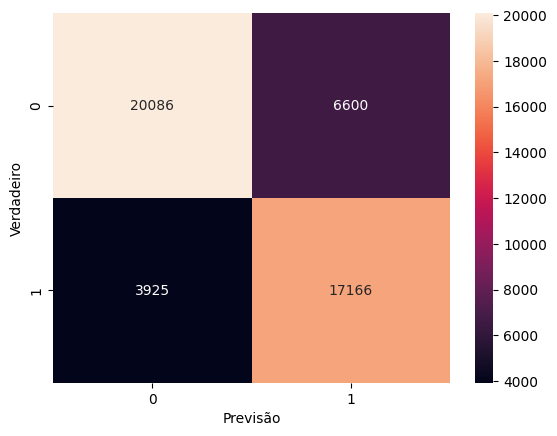

In [17]:
confusion = confusion_matrix(y_test, y_pred)

# Exiba a matriz de confusão como um gráfico
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.show()

In [18]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.84      0.75      0.79     26686
           1       0.72      0.81      0.77     21091

    accuracy                           0.78     47777
   macro avg       0.78      0.78      0.78     47777
weighted avg       0.79      0.78      0.78     47777



In [19]:
df['fumante'].value_counts()

0    89603
1    69653
Name: fumante, dtype: int64

In [20]:
import random

tabela_ajustada = df[df['fumante'] == 0 ]
tabela_ajustada
amostra = tabela_ajustada.sample(n=69653, replace=False)


In [21]:
amostra

,id,age,altura(cm),peso(kg),cintura(cm),visao(esquerda),visao(direita),audiçao(esquerda),audiçao(direita),pressao arterial,relaxamento,acucar no sangue,colesterol,triglicerídeo,colesterol bom,colesterol ruim,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,fumante
38283,38283,40,175,80,79.4,0.5,0.3,1,1,116,82,103,146,41,51,87,15.1,1,0.8,16,19,27,0,0
144828,144828,50,155,60,81.0,1.5,1.2,1,1,112,70,115,176,169,51,92,12.8,1,0.7,23,22,29,0,0
121095,121095,80,145,50,77.0,0.9,0.4,1,2,142,64,88,169,82,40,112,14.0,1,1.1,22,18,13,1,0
41134,41134,55,155,50,72.0,0.9,0.9,1,1,122,67,81,182,187,61,83,14.5,3,0.8,25,24,55,0,0
119213,119213,60,150,60,92.0,0.5,0.3,1,1,135,90,111,246,295,45,141,13.7,1,0.7,23,14,38,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93078,93078,40,150,60,85.0,1.2,1.2,1,1,123,66,75,174,47,66,98,12.8,1,0.7,20,13,11,1,0
33870,33870,45,155,55,73.0,1.0,1.2,1,1,119,73,97,182,40,70,104,12.8,1,0.7,23,29,33,0,0
45540,45540,60,155,65,83.0,1.5,1.5,1,1,122,74,106,228,79,56,155,14.4,1,0.8,23,15,18,1,0
36906,36906,40,150,50,66.0,0.8,0.7,1,1,142,93,121,171,74,55,101,14.3,1,0.7,20,18,32,0,0


In [22]:
tabela_ajustada2 = df[df['fumante'] == 1 ]
tabela_ajustada2

,id,age,altura(cm),peso(kg),cintura(cm),visao(esquerda),visao(direita),audiçao(esquerda),audiçao(direita),pressao arterial,relaxamento,acucar no sangue,colesterol,triglicerídeo,colesterol bom,colesterol ruim,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,fumante
0,0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
2,2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
4,4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1
5,5,50,170,55,51.0,1.2,1.2,1,1,146,95,101,199,343,31,99,15.9,1,0.7,24,42,119,1,1
8,8,40,165,70,89.0,0.7,1.0,1,1,130,80,104,243,163,59,150,15.7,1,0.9,24,21,31,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159242,159242,60,170,70,83.0,0.6,0.8,1,1,134,85,96,151,79,40,95,15.3,1,1.0,21,17,17,0,1
159244,159244,40,170,85,99.0,0.9,0.7,1,1,137,90,84,163,181,34,94,15.0,1,1.0,33,24,62,0,1
159245,159245,35,175,80,87.2,0.7,0.7,1,1,110,70,105,255,325,44,150,15.7,1,1.0,23,41,26,1,1
159249,159249,40,170,85,91.4,1.2,0.9,1,1,110,68,91,220,248,45,125,16.1,1,0.9,26,44,37,0,1


In [23]:
df_ajustado = pd.concat([amostra, tabela_ajustada2], axis=0)
df_ajustado['fumante'].value_counts()

0    69653
1    69653
Name: fumante, dtype: int64

In [50]:
X = df_ajustado.drop(['id','fumante'],axis=1) #df[['hemoglobin','triglicerídeo','altura(cm)','age','Gtp','peso(kg)']]
y = df_ajustado['fumante']

# Divida o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,)

# Crie um modelo XGBClassifier
model = xgb.XGBClassifier(
    objective='multi:softmax', # Classificação multiclasse
    num_class=6,  
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100
)
#6 76,65
# Treine o modelo no conjunto de treinamento
model.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avalie o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

Acurácia do modelo: 78.76%


In [37]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [56]:
for model in [LogisticRegression,KNeighborsClassifier,RandomForestClassifier,xgb.XGBClassifier,]:
    cls = model()
    kfold = KFold(
    n_splits=10,shuffle=True, random_state=42)
    s = cross_val_score(
    cls, X, y, scoring="accuracy", cv=kfold)
    print(f"{model.__name__:22} precisão: "f"{s.mean():.3f} STD: {s.std():.2f}")

LogisticRegression     AUC: 0.745 STD: 0.00
KNeighborsClassifier   AUC: 0.728 STD: 0.00
RandomForestClassifier AUC: 0.782 STD: 0.00
XGBClassifier          AUC: 0.786 STD: 0.00


In [51]:
validaçao = cross_val_score(model, X, y, cv=5)

In [55]:
print(validaçao.mean())
print(validaçao.std())

0.78731711663223
0.0013494553689151825


In [25]:

modelos_classifiers = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', xgb.XGBClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression()),
    
]

# Definir o classificador final (model)
final_estimator = xgb.XGBClassifier()

# Criar o StackingClassifier
stacking_classifier = StackingClassifier(estimators=modelos_classifiers, final_estimator=final_estimator)

# Treinar o StackingClassifier
stacking_classifier.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = stacking_classifier.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do StackingClassifier: {accuracy* 100:.2f}%')

Acurácia do StackingClassifier: 78.43%


In [68]:
clfs = [x()  for x in [LogisticRegression,KNeighborsClassifier,xgb.XGBClassifier,RandomForestClassifier]]
stack = StackingClassifier(
estimators=clfs,
final_estimator=LogisticRegression(),)
kfold = KFold(
n_splits=10,shuffle=True, random_state=42)
d = cross_val_score(
stack, X, y, scoring="accuracy", cv=kfold)
print(f"{stack.__class__.__name__} "f"accuracy: {d.mean():.3f} STD: {d.std():.2f}")

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\CASA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\CASA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_stacking.py", line 584, in fit
    return super().fit(X, self._le.transform(y), sample_weight)
  File "c:\Users\CASA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_stacking.py", line 174, in fit
    names, all_estimators = self._validate_estimators()
  File "c:\Users\CASA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py", line 262, in _validate_estimators
    names, estimators = zip(*self.estimators)
TypeError: 'LogisticRegression' object is not iterable
